In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
sns.set(rc={'figure.figsize':(15,10)})
#import sys
#sys.path.append('../')
#import Clustering_helper_functions as helper

In [126]:
df = pd.read_pickle('PKL/nyc_full_pc.pkl')

In [15]:
df.shape

(1970, 108)

## PCA

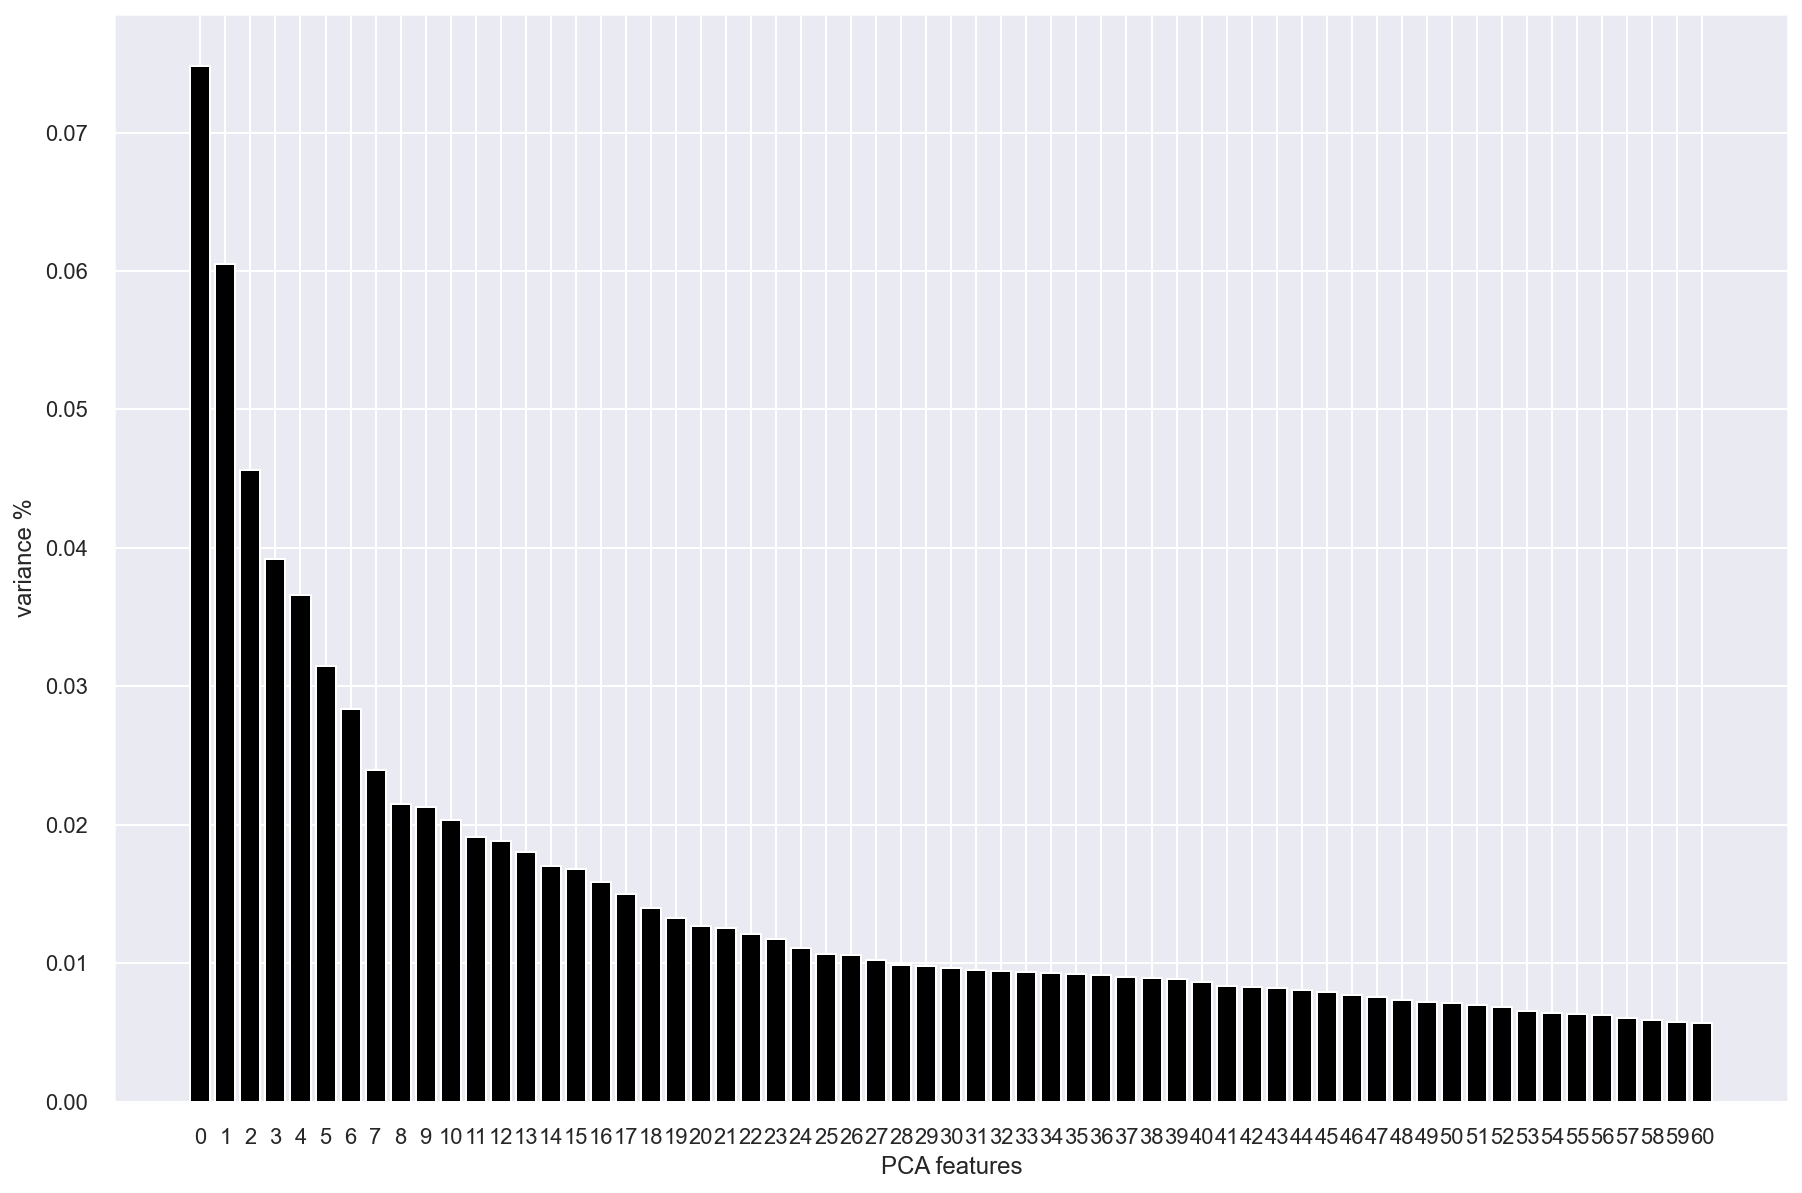

In [39]:
# Imports

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df.drop('TRACTID',axis = 1))
# Create a PCA instance: pca
pca = PCA(n_components=.9)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

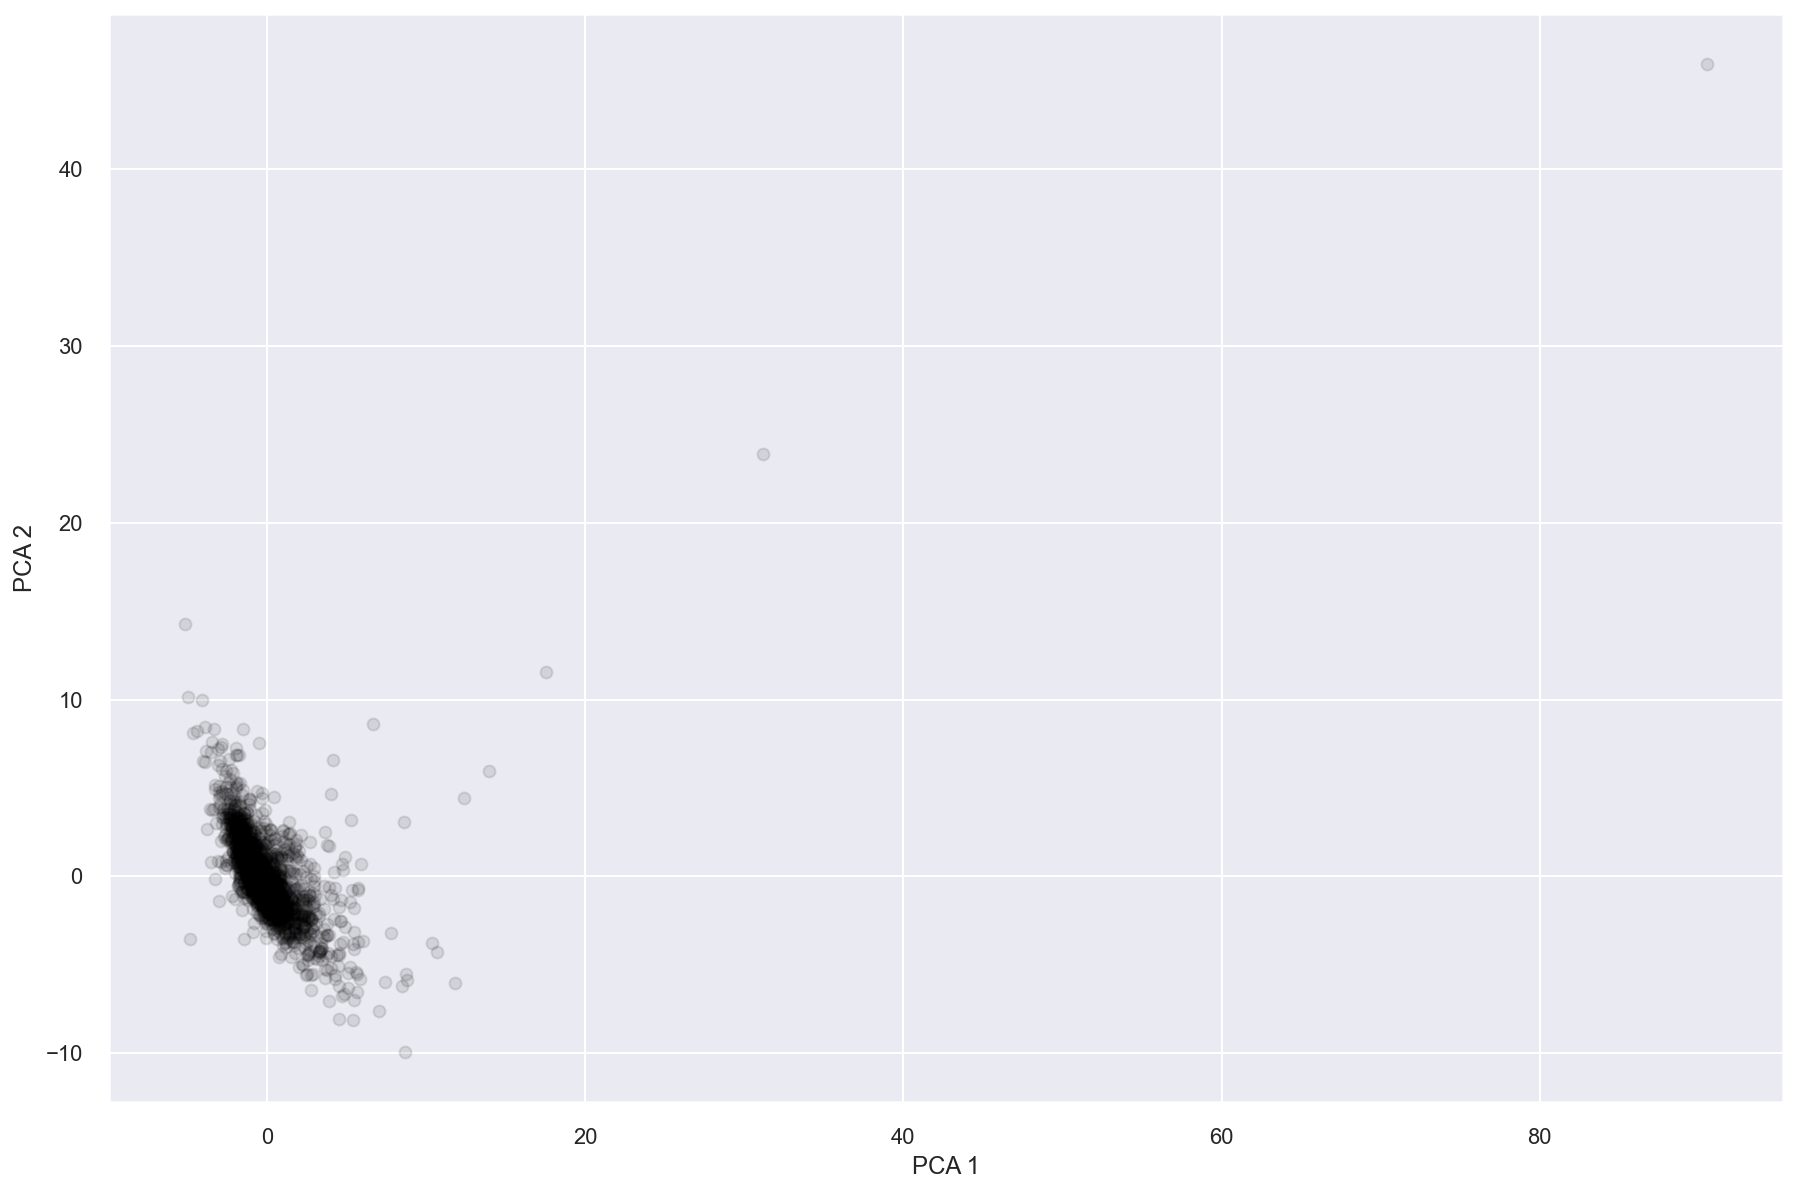

In [40]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


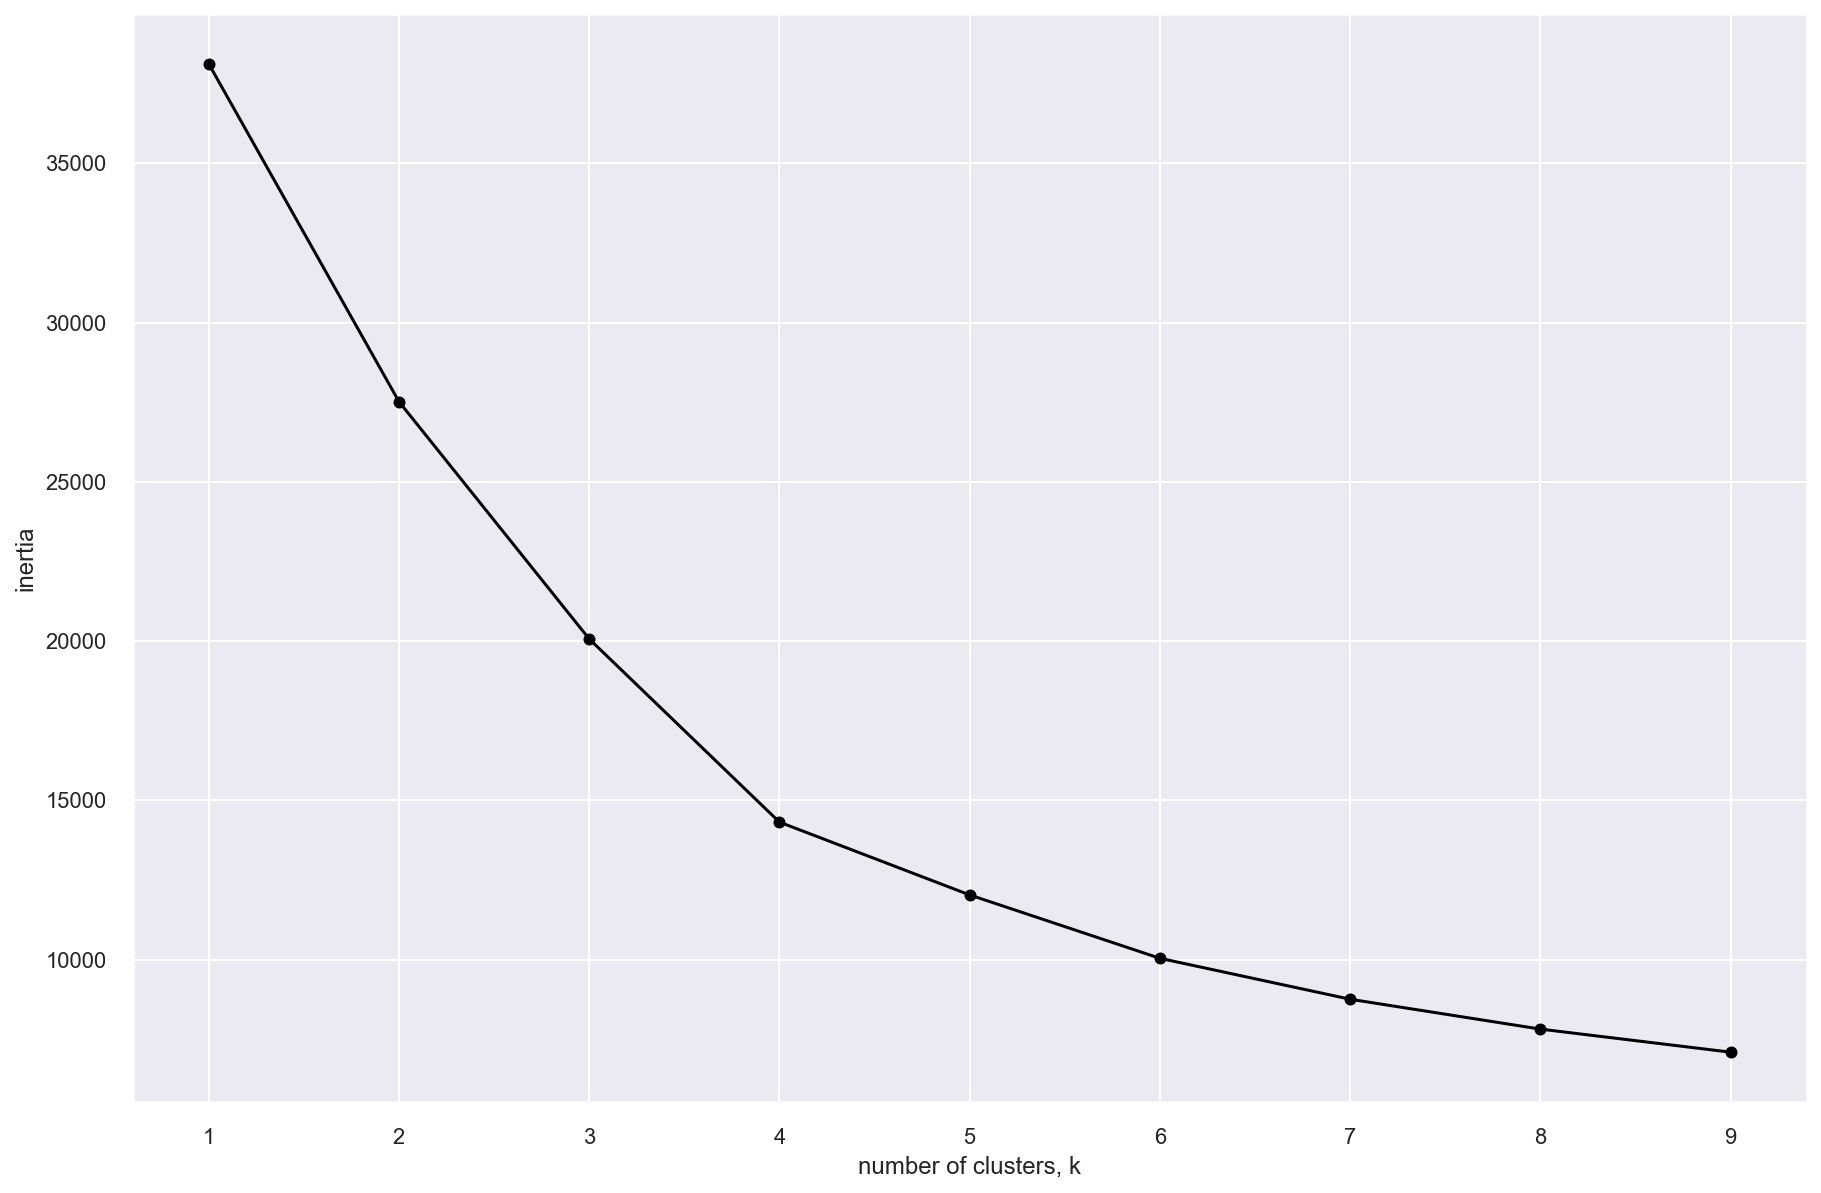

In [41]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Let's try a K-Means

## Hierarchical Clustering

In [51]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_scaled, method = 'ward')

In [52]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


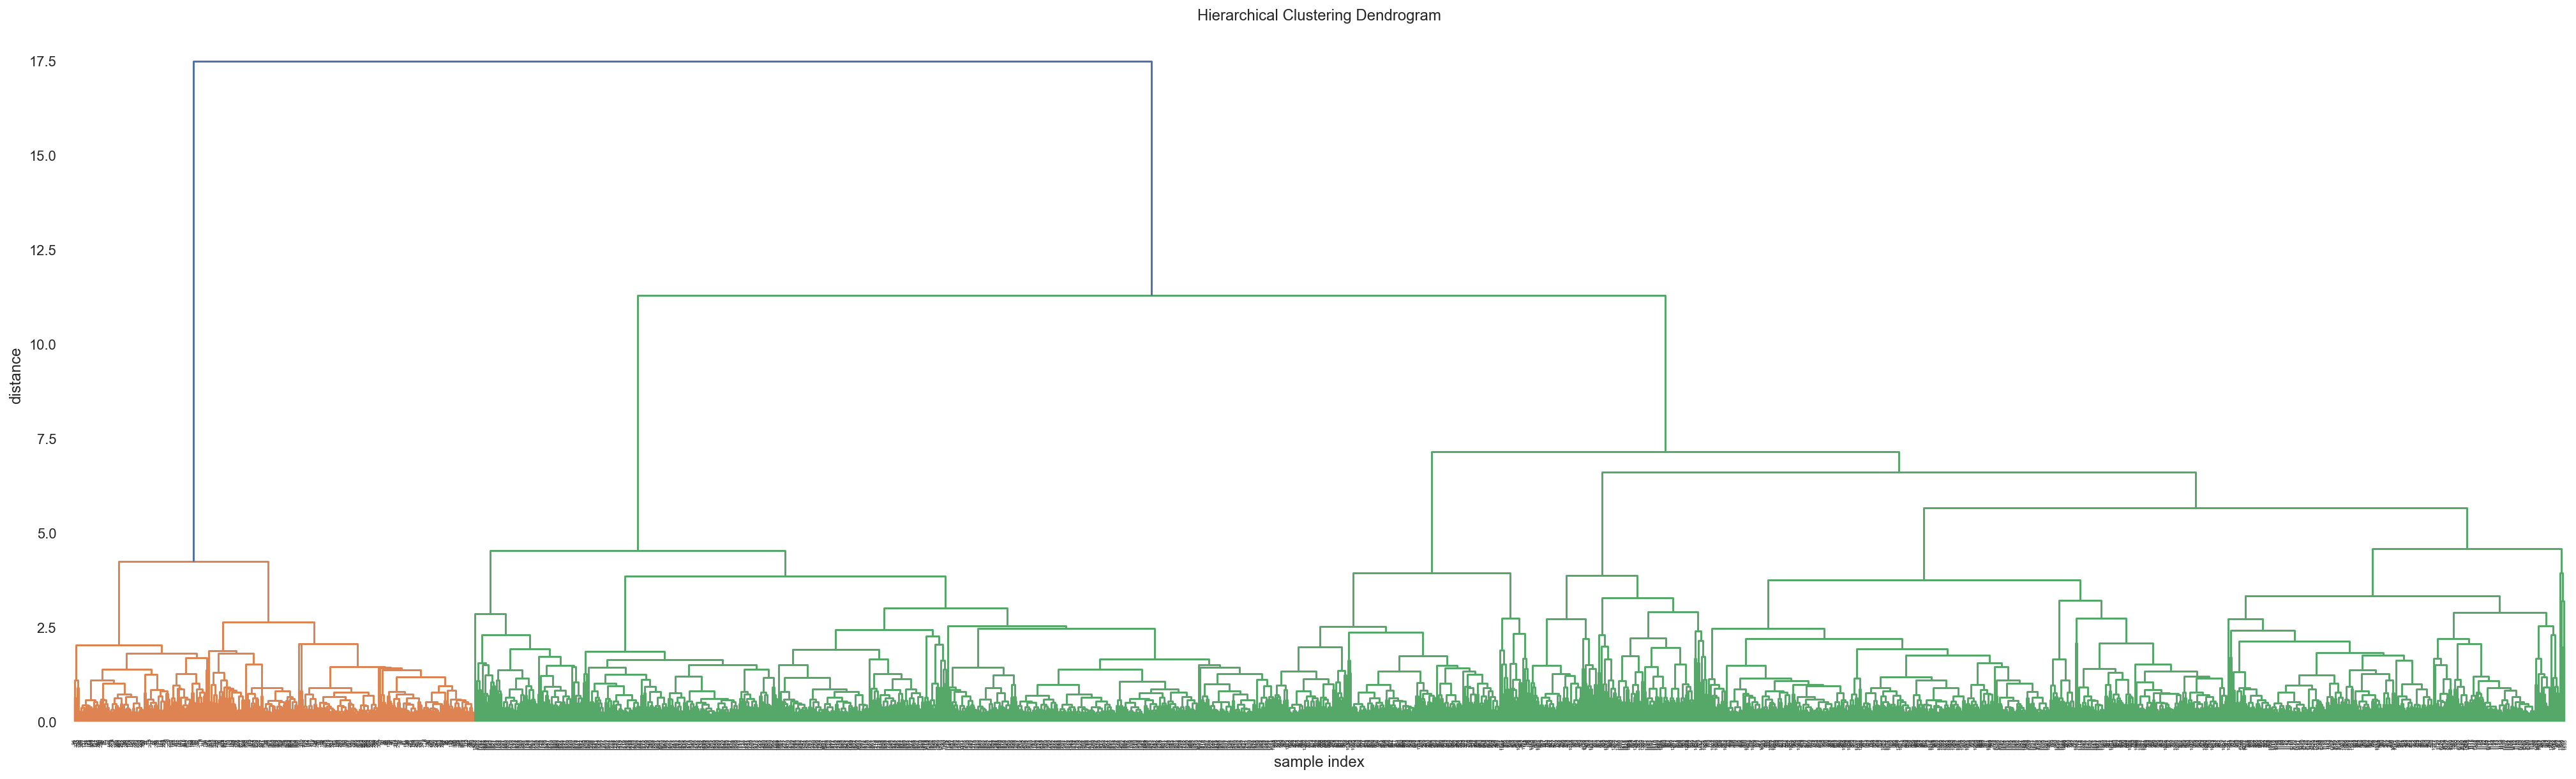

In [54]:
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=4.,  # font size for the x axis labels
)
plt.show()

In [44]:
import scipy.cluster.hierarchy as sch

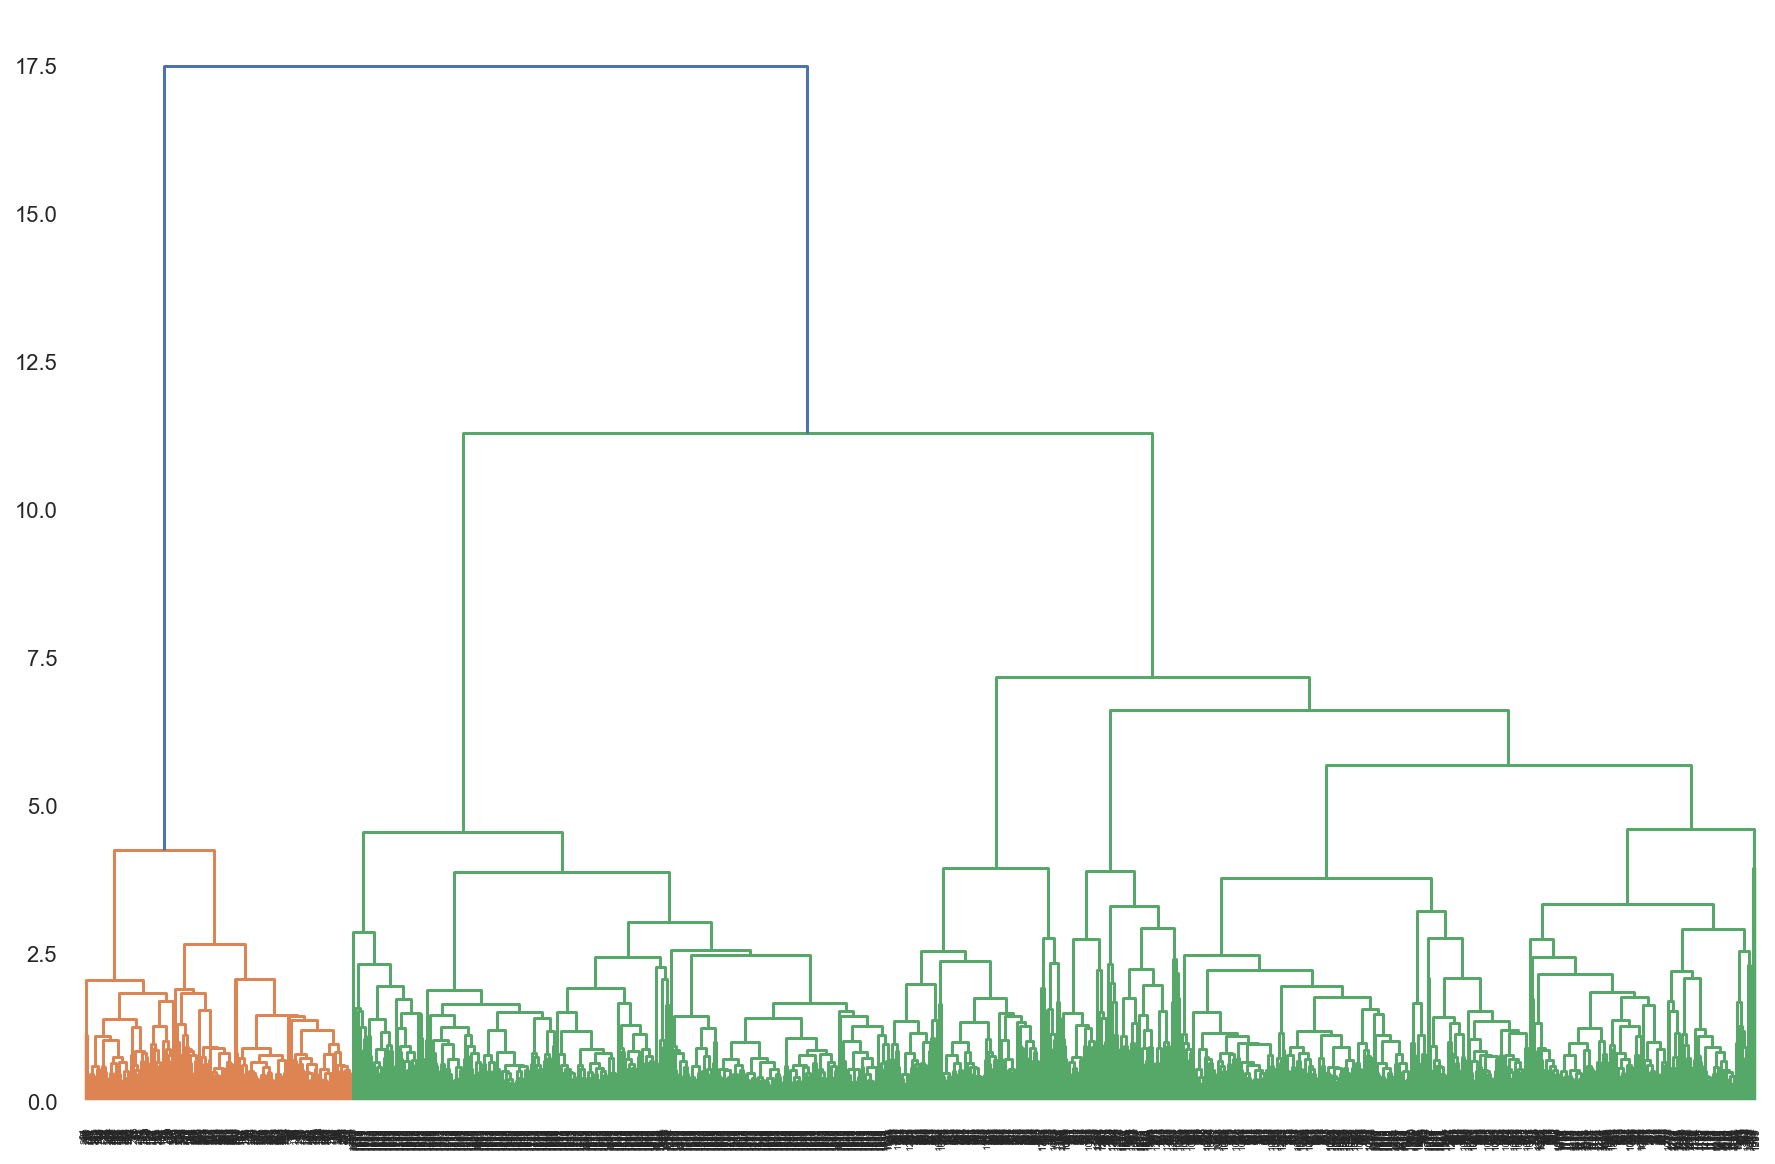

In [45]:
dendogram = sch.dendrogram(sch.linkage(df_scaled,method='ward'))

In [63]:
model4 = AgglomerativeClustering(n_clusters=2,linkage='ward')
model4.fit(df_scaled.values)

AgglomerativeClustering()

In [64]:
# create a new dataframe showing the clusters and scaled data

cluster_df = pd.DataFrame()
cluster_df['tractid']= df_scaled.index.values
cluster_df['cluster']=model4.labels_

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(df_scaled.values, cluster_df['cluster'])}")
      
# not a great silhouette score, let's try subsetting the df

Distribution of clusters:
0    1653
1     317
Name: cluster, dtype: int64
Silhouette score: 0.2547101058575333


## With scikit learn

In [119]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity

In [128]:
df.values

array([['36005000200', 22.25669957686883, -49.12265981898994, ...,
        56.251886052266286, -30.01794217820129, 10.642323748711076],
       ['36005000400', 66.05310802655401, -34.58677711843697, ...,
        -18.746881596622536, -37.9783889110314, -1.5419202142696395],
       ['36005001600', 7.752530074470116, -27.611908559276976, ...,
        -72.38936384949791, -47.44345790826062, -4.264158981126269],
       ...,
       ['36081157903', 2.6815933350689924, -33.07854293017341, ...,
        116.07988373728375, -53.26767902849995, 28.968128360949592],
       ['36081161700', -1.4223445744436798, -25.47273504647769, ...,
        237.28851390562923, -43.97318457623801, -36.88111775898036],
       ['36081162100', 0.25885779000161785, -41.094648842019474, ...,
        124.1386797257234, -33.60405441940406, 90.6885162601626]],
      dtype=object)

In [130]:
df1 = df.copy()
df1 = df1.set_index('TRACTID')

In [131]:
df1.head()

,POP10_POP00_%,NHWHT10%_NHWHT00%,NHBLK10%_NHBLK00%,NTV10%_NTV00%,ASIAN10%_ASIAN00%,HISP10%_HISP00%,HAW10%_HAW00%,INDIA10%_INDIA00%,CHINA10%_CHINA00%,FILIP10%_FILIP00%,JAPAN10%_JAPAN00%,KOREA10%_KOREA00%,VIET10%_VIET00%,MEX10%_MEX00%,PR10%_PR00%,CUBAN10%_CUBAN00%,VAC10%_VAC00%,OHU10%_OHU00%,A18UND10%_A18UND00%,A60UP10%_A60UP00%,A75UP10%_A75UP00%,AGEWHT10%_AGEWHT00%,A15WHT10%_A15WHT00%,A60WHT10%_A60WHT00%,AGEBLK10%_AGEBLK00%,A15BLK10%_A15BLK00%,A60BLK10%_A60BLK00%,AGEHSP10%_AGEHSP00%,A15HSP10%_A15HSP00%,A60HSP10%_A60HSP00%,AGENTV10%_AGENTV00%,A15NTV10%_A15NTV00%,A60NTV10%_A60NTV00%,AGEASN10%_AGEASN00%,A15ASN10%_A15ASN00%,A60ASN10%_A60ASN00%,FAMILY10%_FAMILY00%,FHH10%_FHH00%,OWN10%_OWN00%,RENT10%_RENT00%,NONWHT10%_NONWHT00%,AG15UP12%_AG15UP00%,AG18CV12%_AG18CV00%,AG25UP12%_AG25UP00%,AG5UP12%_AG5UP00%,CLF12%_CLF00%,COL12%_COL00%,DAPOV12%_DAPOV00%,DBPOV12%_DBPOV00%,DFLABF12%_DFLABF00%,DFMPOV12%_DFMPOV00%,DHPOV12%_DHPOV00%,DMULTI12_DMULTI00,DNAPOV12%_DNAPOV00%,DPOV12%_DPOV00%,DWPOV12%_DWPOV00%,EMPCLF12%_EMPCLF00%,FB12%_FB00%,FLABF12%_FLABF00%,GEANC12%_GEANC00%,GEFB12%_GEFB00%,H10YRS12%_H10YRS00%,H30OLD12%_H30OLD00%,HH12_HH00,HHA12%_HHA00%,HHB12%_HHB00%,HHH12%_HHH00%,HHW12%_HHW00%,HINC12_HINC00,HINCA12_HINCA00,HINCB12_HINCB00,HINCH12_HINCH00,HINCW12_HINCW00,HS12%_HS00%,INCPC12_INCPC00,IRANC12%_IRANC00%,IRFB12%_IRFB00%,ITANC12%_ITANC00%,ITFB12%_ITFB00%,LEP12%_LEP00%,MANUF12%_MANUF00%,MHMVAL12_MHMVAL00,MRENT12_MRENT00,MULTI12_MULTI00,Mar-12%_Mar-00%,N10IMM12%_N10IMM00%,N65POV12%_N65POV00%,NAPOV12%_NAPOV00%,NAT12%_NAT00%,NBPOV12%_NBPOV00%,NFMPOV12%_NFMPOV00%,NHPOV12%_NHPOV00%,NNAPOV12%_NNAPOV00%,NONWHT_POV12%_NONWHT_POV00%,NPOV12%_NPOV00%,NWPOV12%_NWPOV00%,OHU12%_OHU00SP%,OLANG12%_OLANG00%,PROF12%_PROF00%,RUANC12%_RUANC00%,RUFB12%_RUFB00%,SCANC12%_SCANC00%,SCFB12%_SCFB00%,SEMP12%_SEMP00%,UNEMP12%_UNEMP00%,VET12%_VET00%,WDS12%_WDS00%
TRACTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36005000200,22.256700,-49.122660,2.573296,22.692663,348.237194,-0.644172,0.0,203.810403,1454.107060,758.848639,-18.204892,0.000000,0.000000,116.646503,-18.826570,15.475447,182.068770,193.017868,-10.197502,2.854297,31.927594,-49.122660,-66.839821,-54.953419,3.649573,-6.072603,14.172339,-0.644172,-15.543947,9.060145,63.590217,308.975542,0.000000,504.374968,2517.443470,390.770651,1.197669,3.990766,-5.905117,8.264145,2.838039,8.879956,8.484428,0.539555,1.844618,22.393365,142.097784,2506.009717,20.365903,9.247228,-14.178971,-6.365021,22.689076,181.525137,0.377138,-84.919520,21.299511,70.318700,19.610549,-100.000000,0.0,36.827888,16.872201,16.028495,0.000000,12.868612,-2.913313,-68.916624,67.493359,0.000000,17.352303,83.384483,4.320000,-31.361288,49.261727,-64.948282,0.0,16.509559,0.0,0.670111,-81.883839,151.459202,63.904494,58.588235,-21.895338,21.549184,-41.555690,0.0,88.924073,-2.953788,-17.295788,30.840936,0.0,22.274550,-10.967715,-100.000000,-3.888303,-6.325945,15.352474,0.0,0.0,0.0,0.0,-27.864742,56.251886,-30.017942,10.642324
36005000400,66.053108,-34.586777,11.385660,-6.321804,-10.730190,0.280476,0.0,15.129715,-19.704404,65.609667,-39.778303,-69.889151,0.000000,394.451830,-8.644667,-10.527764,257.457754,195.932358,-8.592067,12.097453,0.766998,-34.586777,-16.466678,-51.822642,11.456335,-8.862351,50.554243,0.280476,-12.027238,12.856409,10.406445,80.665092,0.000000,-15.834736,-13.013104,381.773578,3.068920,9.341070,7.709537,-14.335713,2.612934,9.687382,11.130822,14.013221,0.514230,32.594701,166.931642,-25.778401,11.295048,0.217688,10.224356,-1.157002,63.483643,0.000000,0.774707,-51.347565,37.535351,-7.871313,7.280237,-95.370193,0.0,1.064603,-27.172429,60.649475,-66.482210,18.645907,2.151813,-82.017440,94.378797,210.892422,53.750000,91.365145,43.798074,-21.978661,111.771051,-83.332694,-100.0,-79.419942,-100.0,-5.062644,-5.401775,110.485782,136.576577,32.258065,-19.371906,-8.346285,-75.960616,0.0,9.805351,-53.545514,-36.093053,-37.840080,0.0,-40.487465,-37.047944,-57.235201,-4.203994,-1.180914,89.5

In [132]:
scaler=MinMaxScaler()
# fit the data
scaled_data = scaler.fit_transform(df1.values)
# put scaled data into a df
df_scaled = pd.DataFrame(scaled_data,index=df1.index,columns=df1.columns)

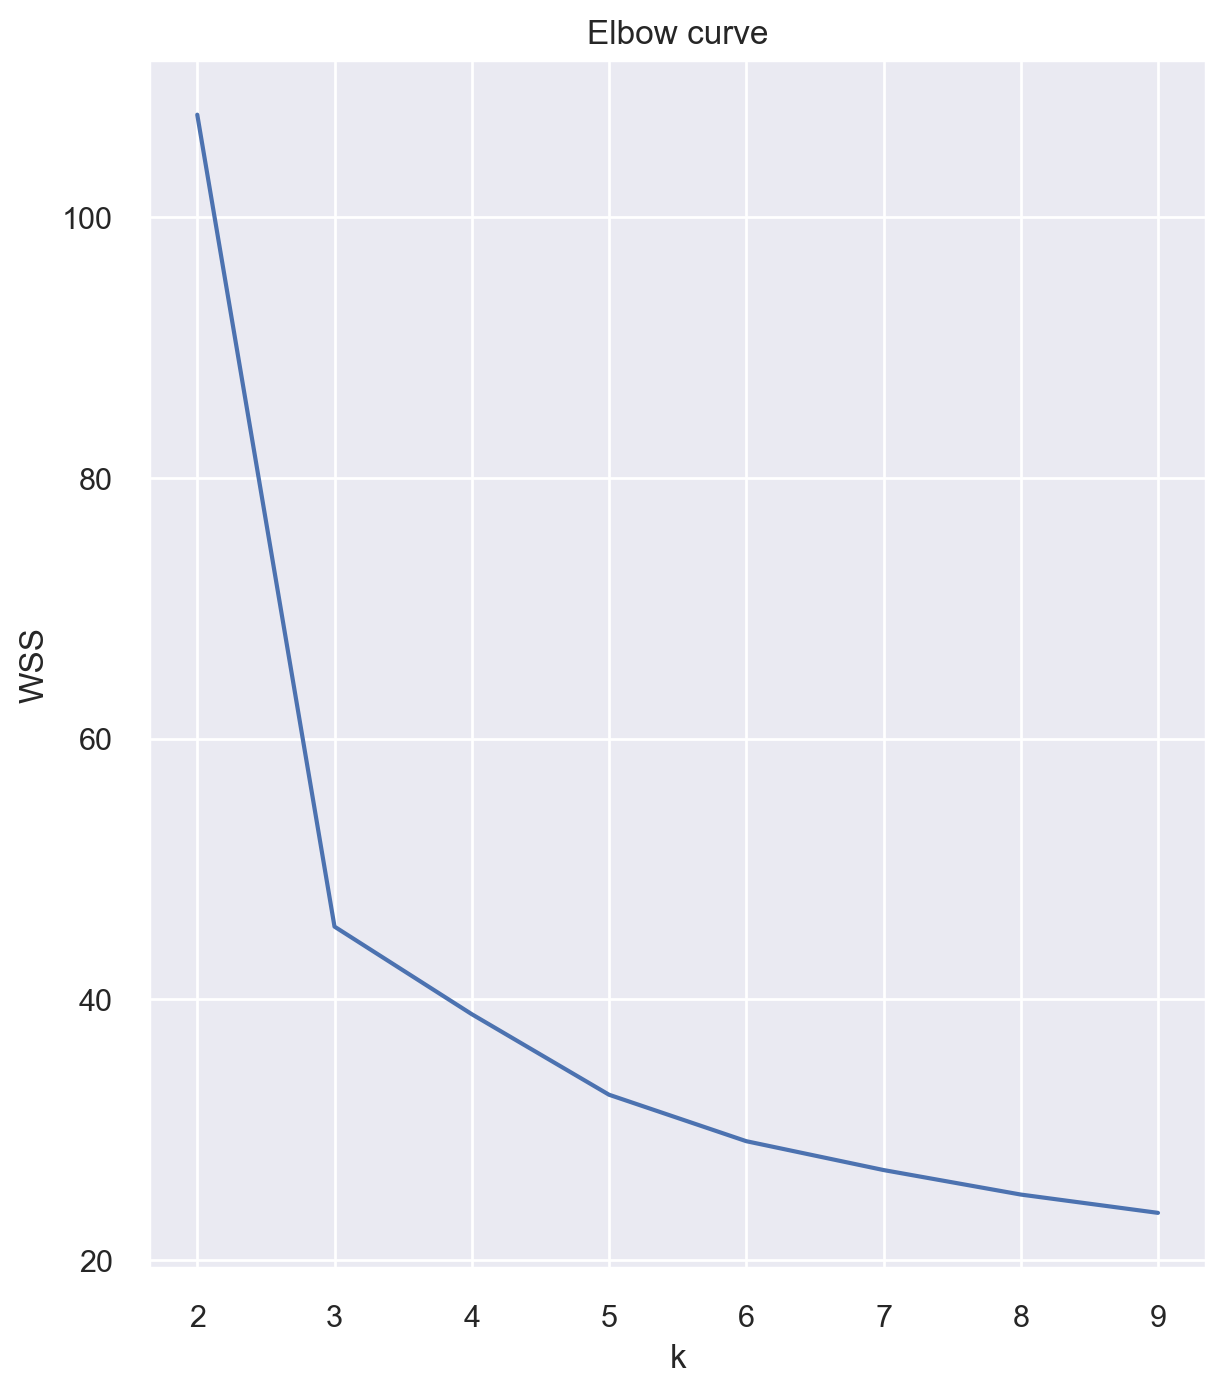

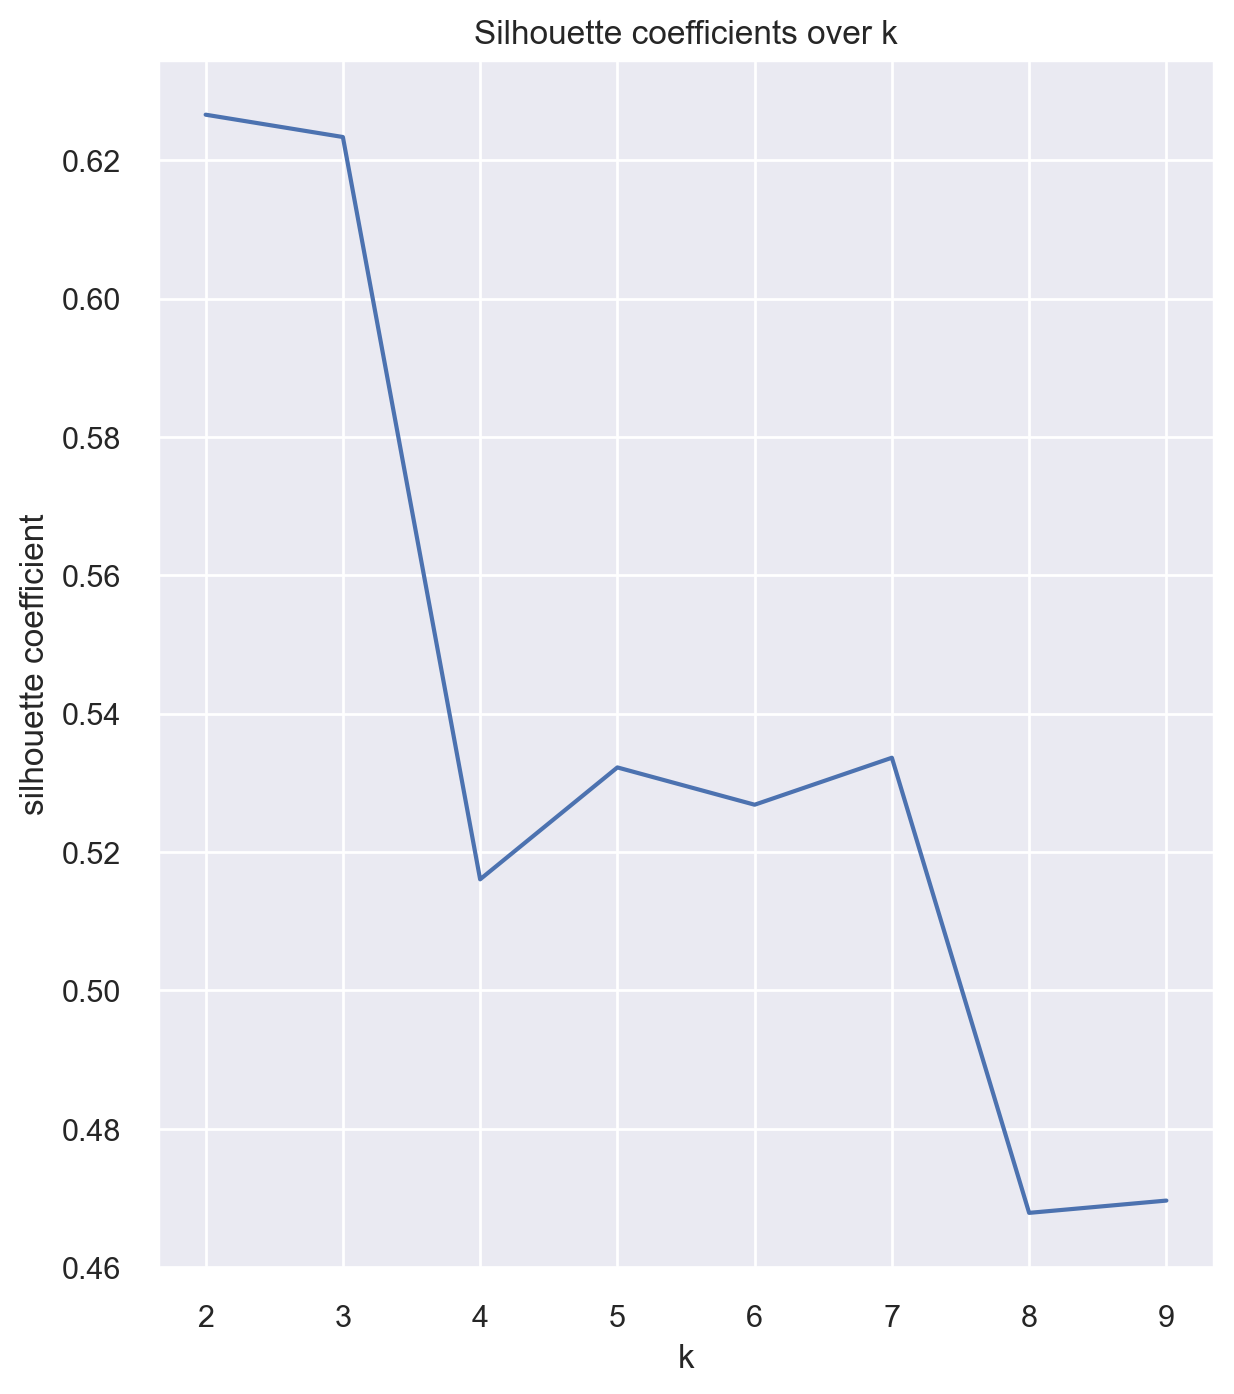

In [133]:

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
#plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [135]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=3).fit(df_scaled)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=df_scaled.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(df_scaled.values, cluster_df['cluster'])}")

Distribution of clusters:
2    1002
1     649
0     319
Name: cluster, dtype: int64
Silhouette score: 0.09352934358999246


## Using the widely accepted variables associated with gentrification

In [136]:
df_scaled.head()

,POP10_POP00_%,NHWHT10%_NHWHT00%,NHBLK10%_NHBLK00%,NTV10%_NTV00%,ASIAN10%_ASIAN00%,HISP10%_HISP00%,HAW10%_HAW00%,INDIA10%_INDIA00%,CHINA10%_CHINA00%,FILIP10%_FILIP00%,JAPAN10%_JAPAN00%,KOREA10%_KOREA00%,VIET10%_VIET00%,MEX10%_MEX00%,PR10%_PR00%,CUBAN10%_CUBAN00%,VAC10%_VAC00%,OHU10%_OHU00%,A18UND10%_A18UND00%,A60UP10%_A60UP00%,A75UP10%_A75UP00%,AGEWHT10%_AGEWHT00%,A15WHT10%_A15WHT00%,A60WHT10%_A60WHT00%,AGEBLK10%_AGEBLK00%,A15BLK10%_A15BLK00%,A60BLK10%_A60BLK00%,AGEHSP10%_AGEHSP00%,A15HSP10%_A15HSP00%,A60HSP10%_A60HSP00%,AGENTV10%_AGENTV00%,A15NTV10%_A15NTV00%,A60NTV10%_A60NTV00%,AGEASN10%_AGEASN00%,A15ASN10%_A15ASN00%,A60ASN10%_A60ASN00%,FAMILY10%_FAMILY00%,FHH10%_FHH00%,OWN10%_OWN00%,RENT10%_RENT00%,NONWHT10%_NONWHT00%,AG15UP12%_AG15UP00%,AG18CV12%_AG18CV00%,AG25UP12%_AG25UP00%,AG5UP12%_AG5UP00%,CLF12%_CLF00%,COL12%_COL00%,DAPOV12%_DAPOV00%,DBPOV12%_DBPOV00%,DFLABF12%_DFLABF00%,DFMPOV12%_DFMPOV00%,DHPOV12%_DHPOV00%,DMULTI12_DMULTI00,DNAPOV12%_DNAPOV00%,DPOV12%_DPOV00%,DWPOV12%_DWPOV00%,EMPCLF12%_EMPCLF00%,FB12%_FB00%,FLABF12%_FLABF00%,GEANC12%_GEANC00%,GEFB12%_GEFB00%,H10YRS12%_H10YRS00%,H30OLD12%_H30OLD00%,HH12_HH00,HHA12%_HHA00%,HHB12%_HHB00%,HHH12%_HHH00%,HHW12%_HHW00%,HINC12_HINC00,HINCA12_HINCA00,HINCB12_HINCB00,HINCH12_HINCH00,HINCW12_HINCW00,HS12%_HS00%,INCPC12_INCPC00,IRANC12%_IRANC00%,IRFB12%_IRFB00%,ITANC12%_ITANC00%,ITFB12%_ITFB00%,LEP12%_LEP00%,MANUF12%_MANUF00%,MHMVAL12_MHMVAL00,MRENT12_MRENT00,MULTI12_MULTI00,Mar-12%_Mar-00%,N10IMM12%_N10IMM00%,N65POV12%_N65POV00%,NAPOV12%_NAPOV00%,NAT12%_NAT00%,NBPOV12%_NBPOV00%,NFMPOV12%_NFMPOV00%,NHPOV12%_NHPOV00%,NNAPOV12%_NNAPOV00%,NONWHT_POV12%_NONWHT_POV00%,NPOV12%_NPOV00%,NWPOV12%_NWPOV00%,OHU12%_OHU00SP%,OLANG12%_OLANG00%,PROF12%_PROF00%,RUANC12%_RUANC00%,RUFB12%_RUFB00%,SCANC12%_SCANC00%,SCFB12%_SCFB00%,SEMP12%_SEMP00%,UNEMP12%_UNEMP00%,VET12%_VET00%,WDS12%_WDS00%
TRACTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36005000200,0.113868,0.010912,0.054074,0.002935,0.143236,0.204752,0.000032,0.043181,0.182479,0.000705,0.000659,0.001579,0.000021,0.022351,0.103251,0.004559,0.073245,0.050452,0.205485,0.322881,0.307456,0.010912,0.003295,0.018753,0.041100,0.001323,0.010593,0.204752,0.074578,0.072366,0.000380,0.000105,0.000455,0.194760,0.139852,0.019040,0.052240,0.212736,0.017460,0.180100,0.220586,0.625358,0.567841,0.393465,0.589829,0.016916,0.154963,0.049441,0.001579,0.544498,0.027782,0.022047,0.113556,0.000253,0.145745,0.001020,0.015005,0.254338,0.020586,0.000000,0.000624,0.490428,0.052475,0.126027,0.001467,0.002268,0.052372,0.000157,0.075392,0.039276,0.042171,0.104865,0.037319,0.195968,0.245409,0.003428,0.001839,0.000062,0.000194,0.016713,0.013857,0.411284,0.150649,0.154437,0.179741,0.110471,0.000087,0.00006,0.361645,0.001173,0.016029,0.006787,0.000343,0.016811,0.079646,0.000000,0.556678,0.154285,0.125511,0.000013,0.061523,0.000103,0.062662,0.008307,0.038844,0.119530,0.262148
36005000400,0.164538,0.015354,0.058720,0.002241,0.028527,0.207115,0.000032,0.016364,0.009428,0.000136,0.000485,0.000476,0.000021,0.051011,0.116202,0.003533,0.093650,0.051109,0.211500,0.364068,0.225171,0.015354,0.008302,0.020057,0.044196,0.001283,0.013968,0.207115,0.077684,0.074884,0.000256,0.000046,0.000455,0.027122,0.004648,0.018690,0.054469,0.225795,0.020035,0.125845,0.219991,0.637892,0.604178,0.552336,0.540710,0.019148,0.173667,0.001408,0.001460,0.460524,0.042609,0.023273,0.158534,0.000090,0.147291,0.003291,0.018527,0.121401,0.017735,0.001744,0.000624,0.298819,0.028893,0.182841,0.000492,0.002385,0.055104,0.000091,0.094100,0.108314,0.051928,0.108612,0.047530,0.233711,0.443550,0.001630,0.000000,0.000011,0.000000,0.015762,0.072359,0.408145,0.269302,0.125243,0.186827,0.083300,0.000036,0.00006,0.200317,0.000562,0.012386,0.003224,0.000343,0.008182,0.056315,0.000666,0.552473,0.164177,0.216033,0.000013,0.061523,0.000103,0.062662,0.026733,0.020200,0.105934,0.228281
36005001600,0.097088,0.017486,0.055819,0.002131,0.030715,0.204942,0.000032,0.01744

In [137]:
df_scaled_gent = df_scaled[['HINC12_HINC00','MHMVAL12_MHMVAL00','MRENT12_MRENT00','OWN10%_OWN00%','NONWHT10%_NONWHT00%',
                            'COL12%_COL00%','NHWHT10%_NHWHT00%']]

In [138]:
df_scaled_gent.head()

,HINC12_HINC00,MHMVAL12_MHMVAL00,MRENT12_MRENT00,OWN10%_OWN00%,NONWHT10%_NONWHT00%,COL12%_COL00%,NHWHT10%_NHWHT00%
TRACTID,,,,,,,
36005000200,0.075392,0.411284,0.150649,0.017460,0.220586,0.154963,0.010912
36005000400,0.094100,0.408145,0.269302,0.020035,0.219991,0.173667,0.015354
36005001600,0.050465,0.408990,0.116850,0.018201,0.216935,0.067003,0.017486
36005001900,0.048958,0.414112,0.254337,0.008188,0.202979,0.230410,0.047258
36005002000,0.066390,0.406077,0.203000,0.016104,0.214152,0.143059,0.022710


In [139]:
df_scaled_gent2 = df_scaled[['HINC12_HINC00','MHMVAL12_MHMVAL00','MRENT12_MRENT00','OWN10%_OWN00%','NONWHT10%_NONWHT00%',
                            'COL12%_COL00%']]

In [140]:
df_scaled_gent3 = df_scaled[['HINC12_HINC00','MHMVAL12_MHMVAL00','MRENT12_MRENT00','OWN10%_OWN00%','NONWHT10%_NONWHT00%',
                            'COL12%_COL00%','NHWHT10%_NHWHT00%','NONWHT_POV12%_NONWHT_POV00%']]

In [152]:
df_scaled_gent4 = df_scaled[['HINC12_HINC00','MHMVAL12_MHMVAL00','MRENT12_MRENT00','OWN10%_OWN00%','NONWHT10%_NONWHT00%',
                            'COL12%_COL00%','NHWHT10%_NHWHT00%','NONWHT_POV12%_NONWHT_POV00%','PROF12%_PROF00%']]

## Use the first subset of features

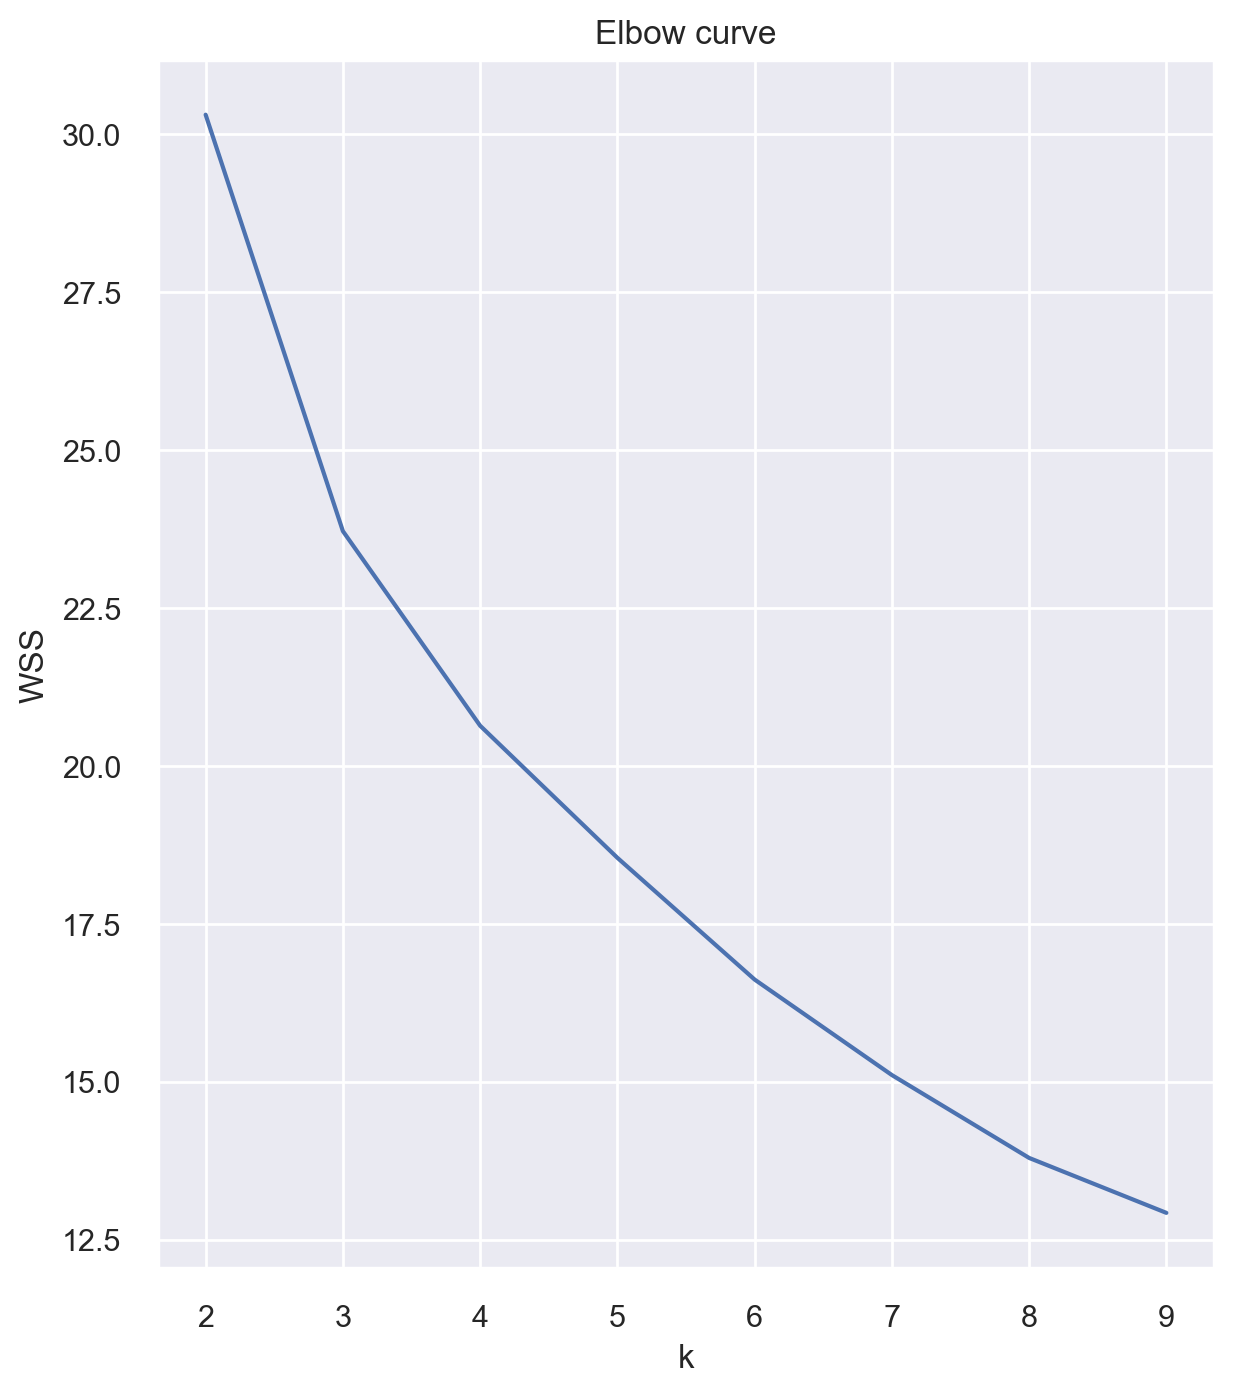

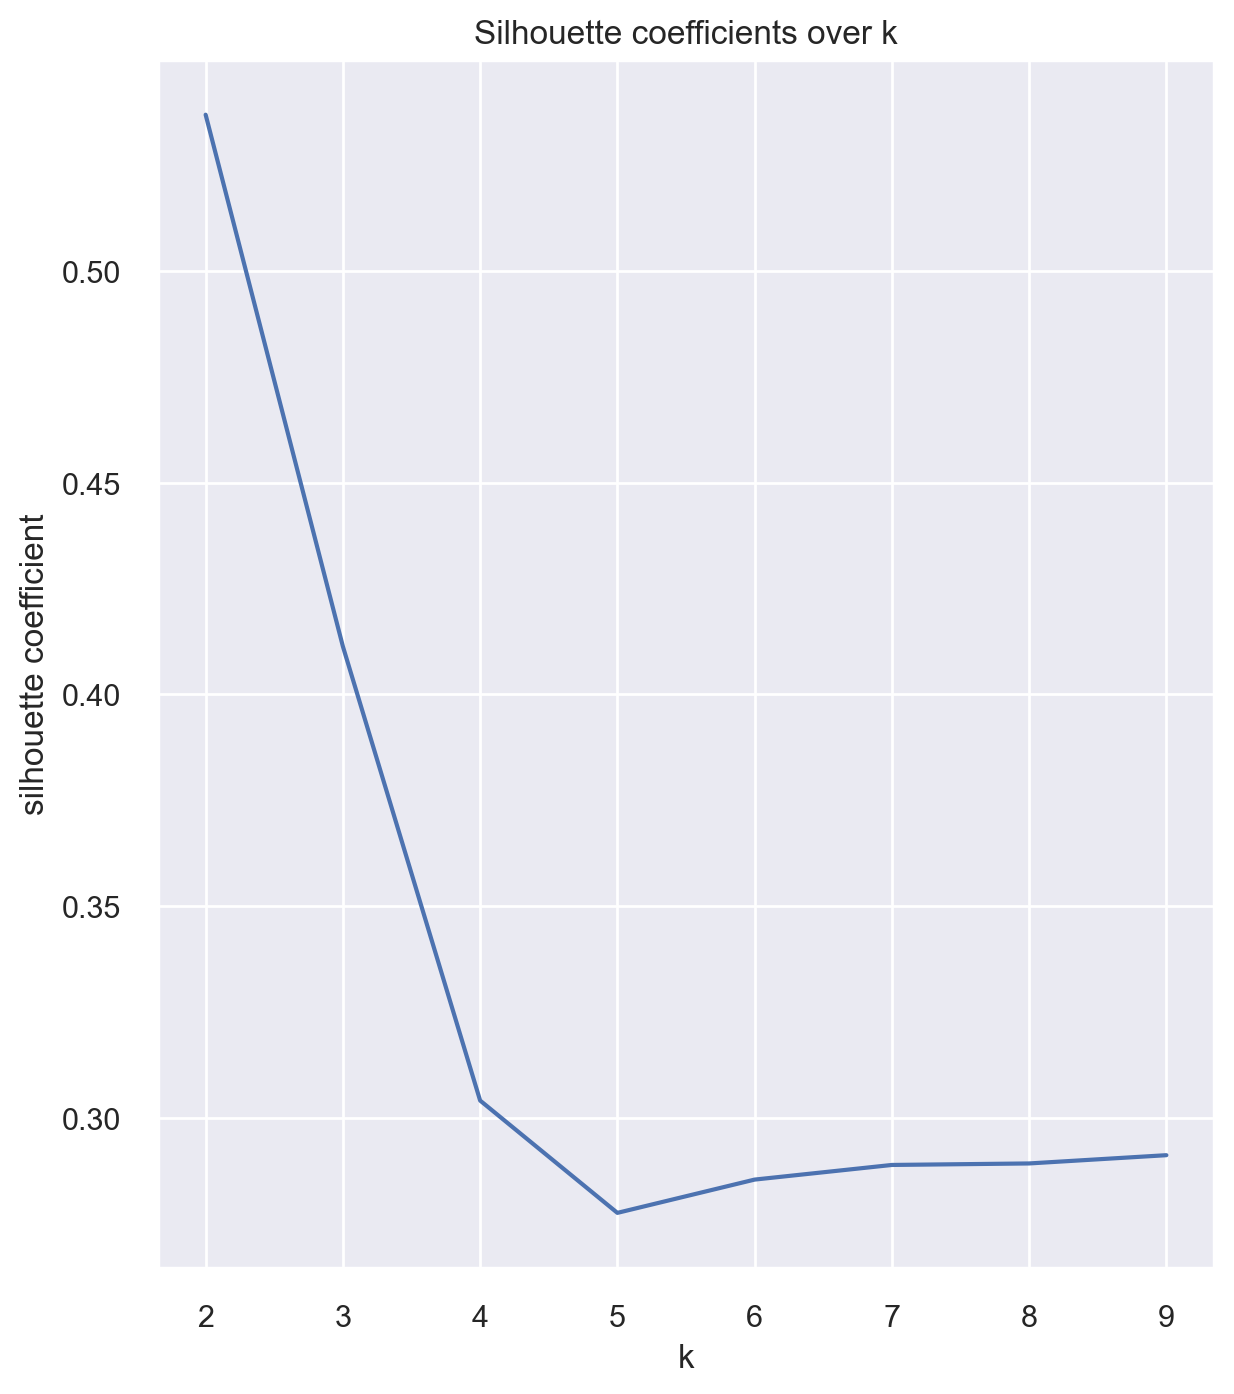

In [142]:
# let this variable be the different dfs I create to test the different variables

v = df_scaled_gent # change this to test different 



X = v.copy()


distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
#plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [143]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=3).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
2    1551
0     299
1     120
Name: cluster, dtype: int64
Silhouette score: 0.4123713046924522


In [144]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=4).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
1    1342
2     322
3     264
0      42
Name: cluster, dtype: int64
Silhouette score: 0.36446561213462647


## Second set of features

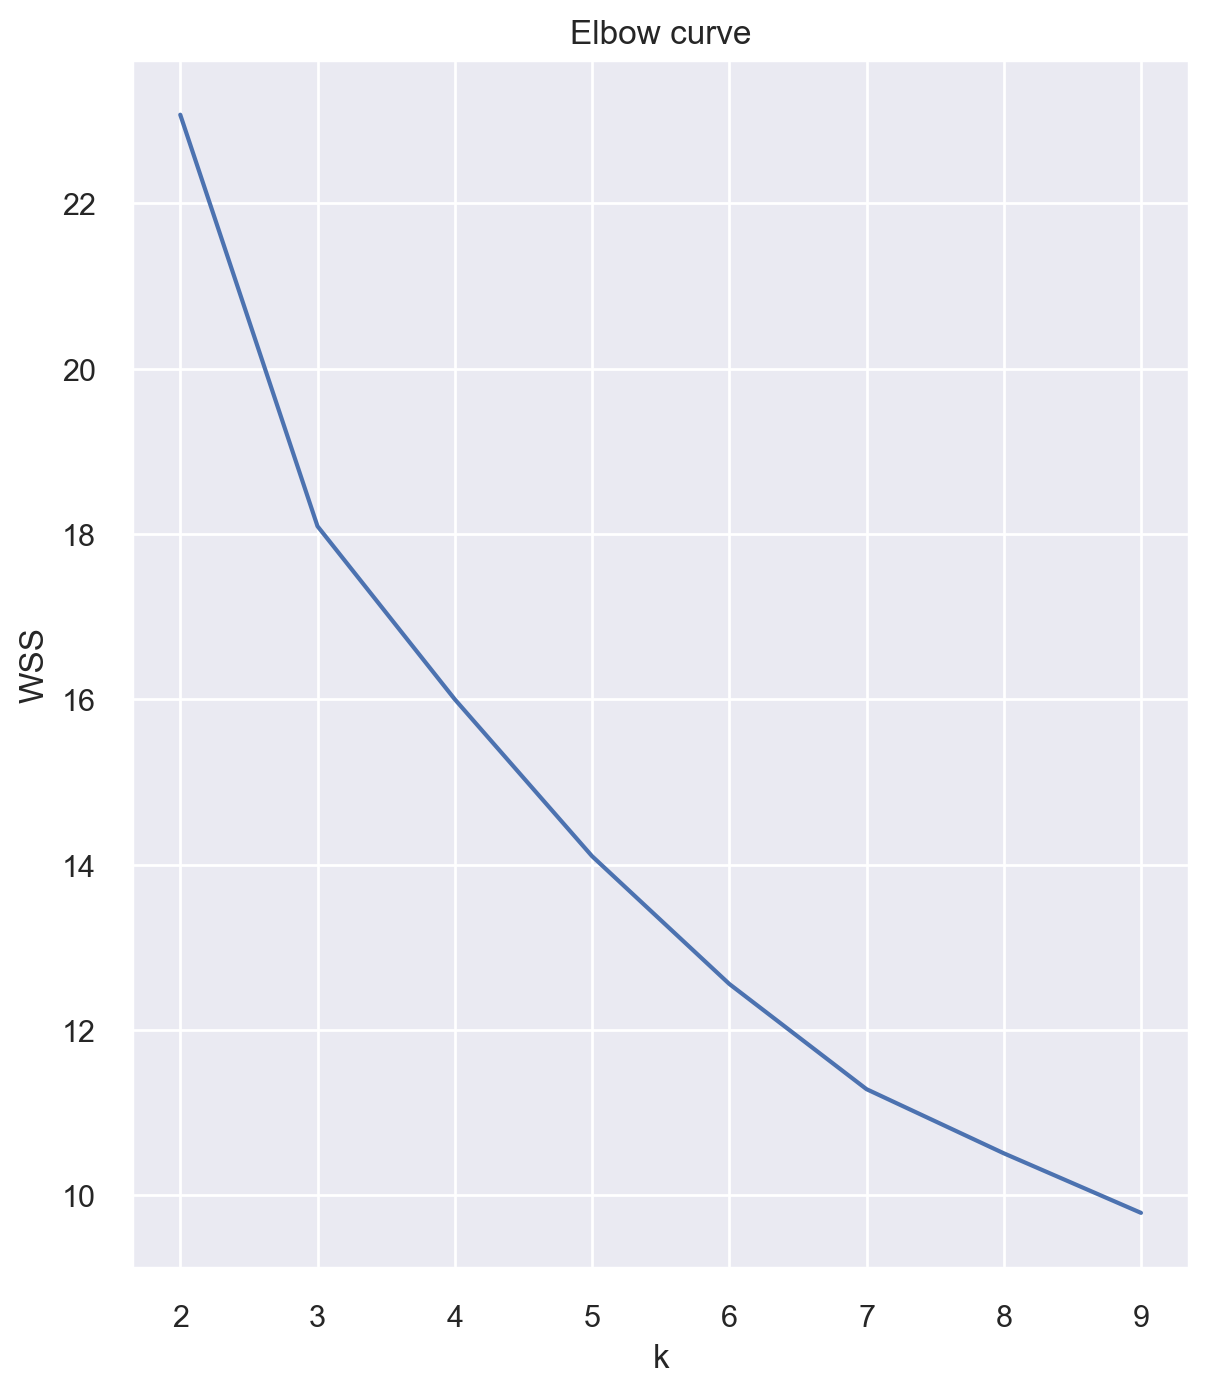

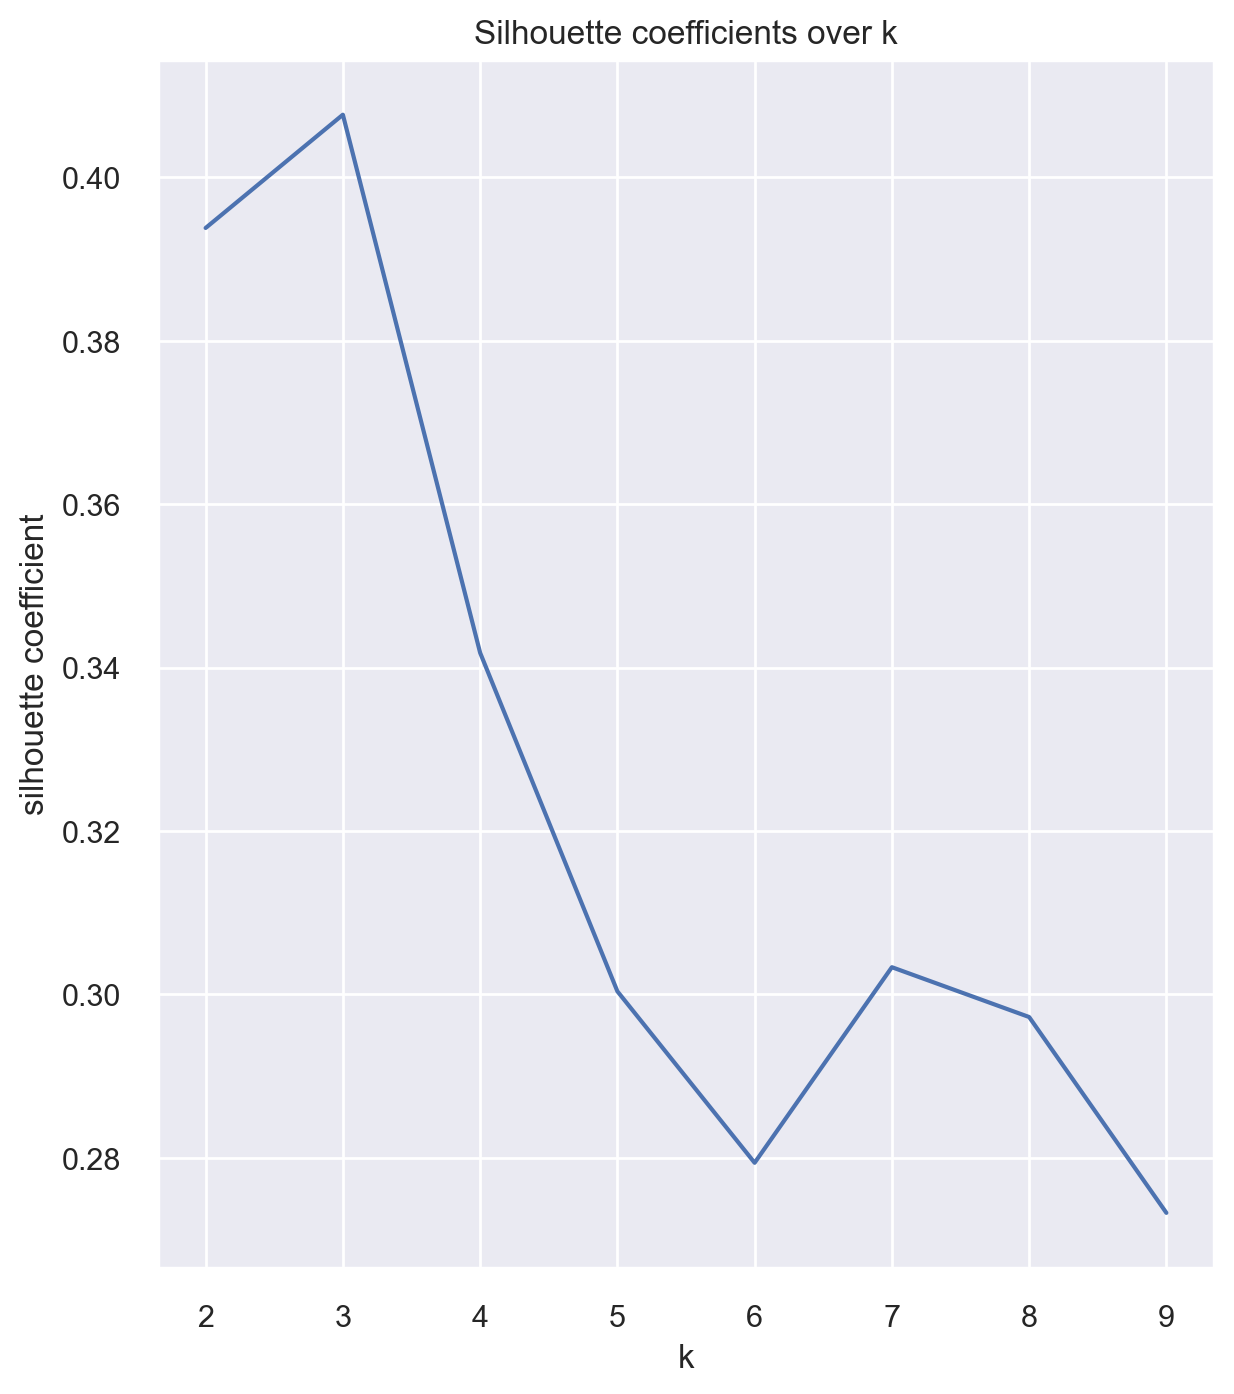

In [146]:
# let this variable be the different dfs I create to test the different variables

v = df_scaled_gent2 # change this to test different 



X = v.copy()


distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
#plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [147]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=3).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
0    1448
1     282
2     240
Name: cluster, dtype: int64
Silhouette score: 0.4062109599216338


In [148]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=6).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
0    1002
1     547
4     305
3      94
2      21
5       1
Name: cluster, dtype: int64
Silhouette score: 0.2743123532560524


## Third set of features

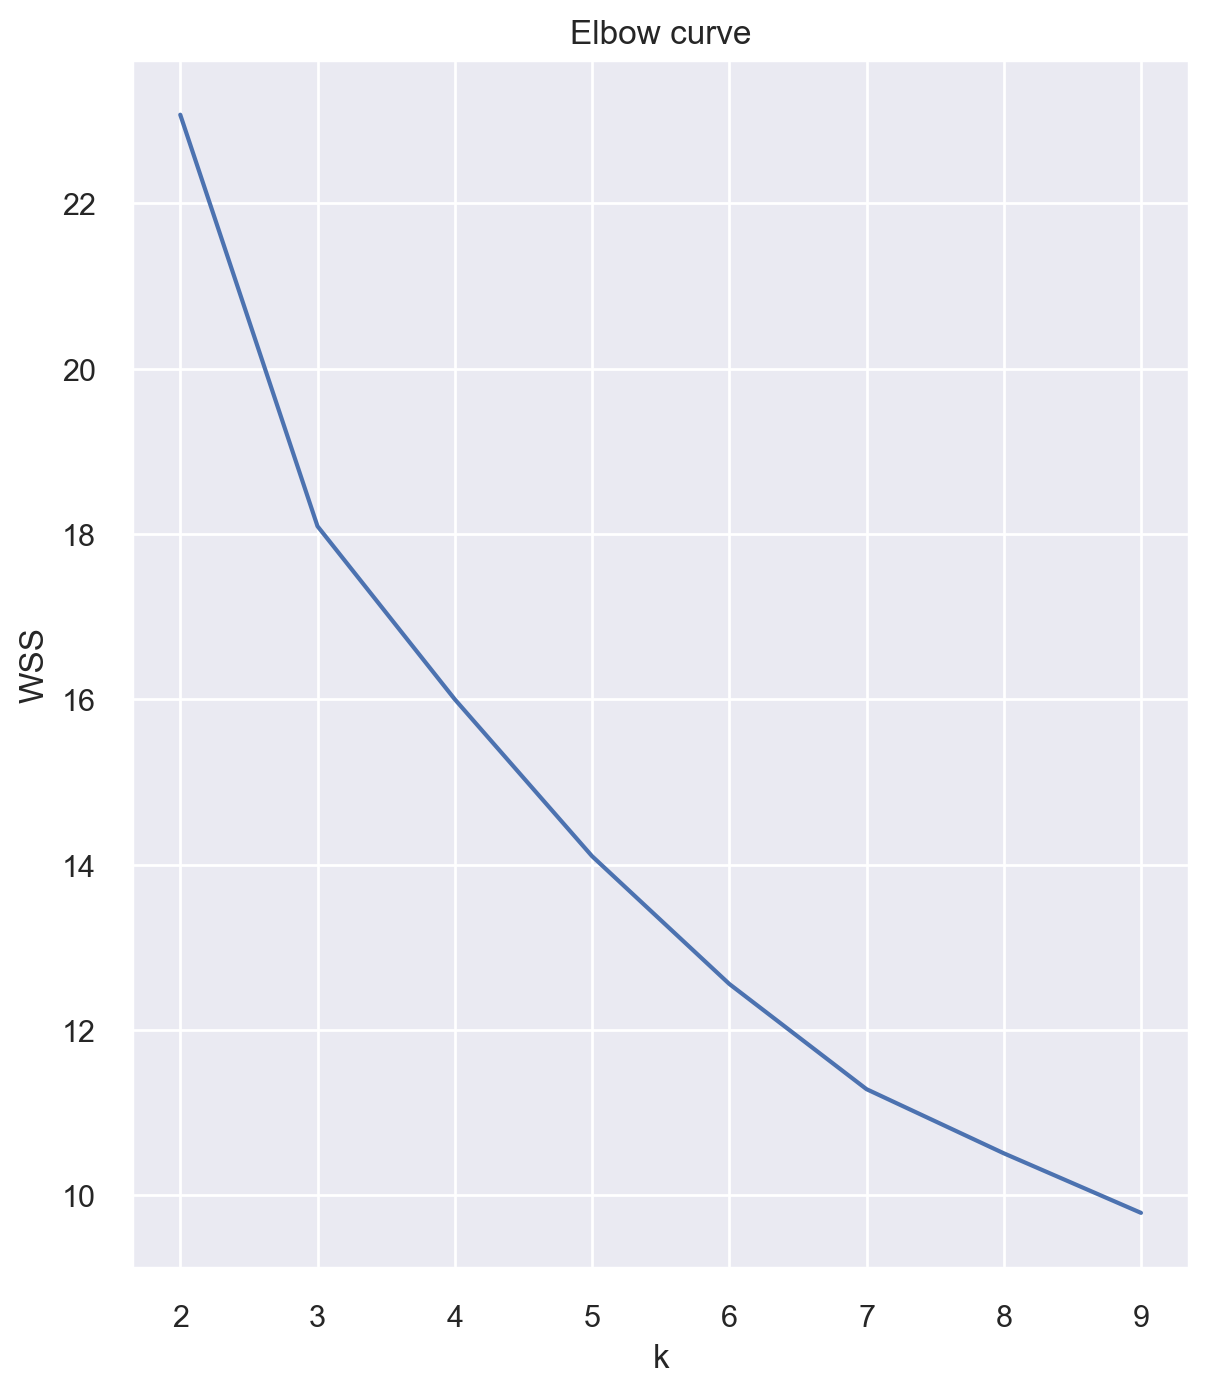

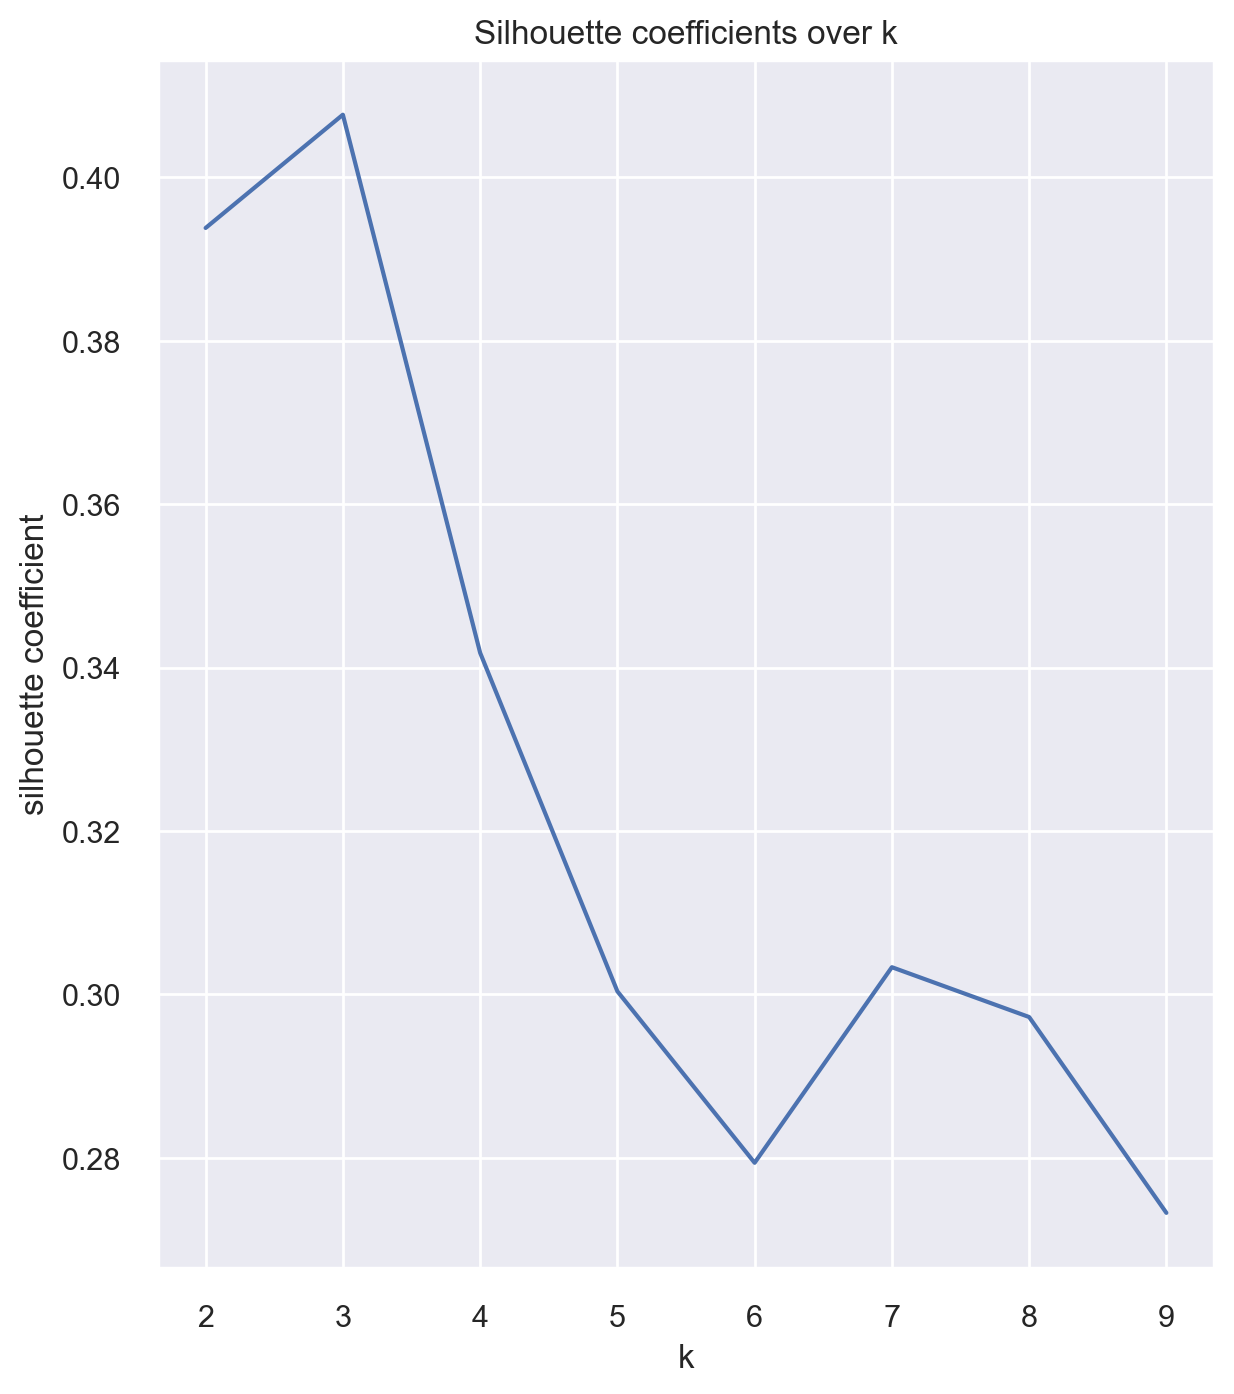

In [149]:
# let this variable be the different dfs I create to test the different variables

v = df_scaled_gent2 # change this to test different 



X = v.copy()


distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
#plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [150]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=3).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
0    1448
2     282
1     240
Name: cluster, dtype: int64
Silhouette score: 0.4062109599216338


In [151]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=4).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
3    1329
2     386
0     217
1      38
Name: cluster, dtype: int64
Silhouette score: 0.3411263936080631


## Fourth set of features

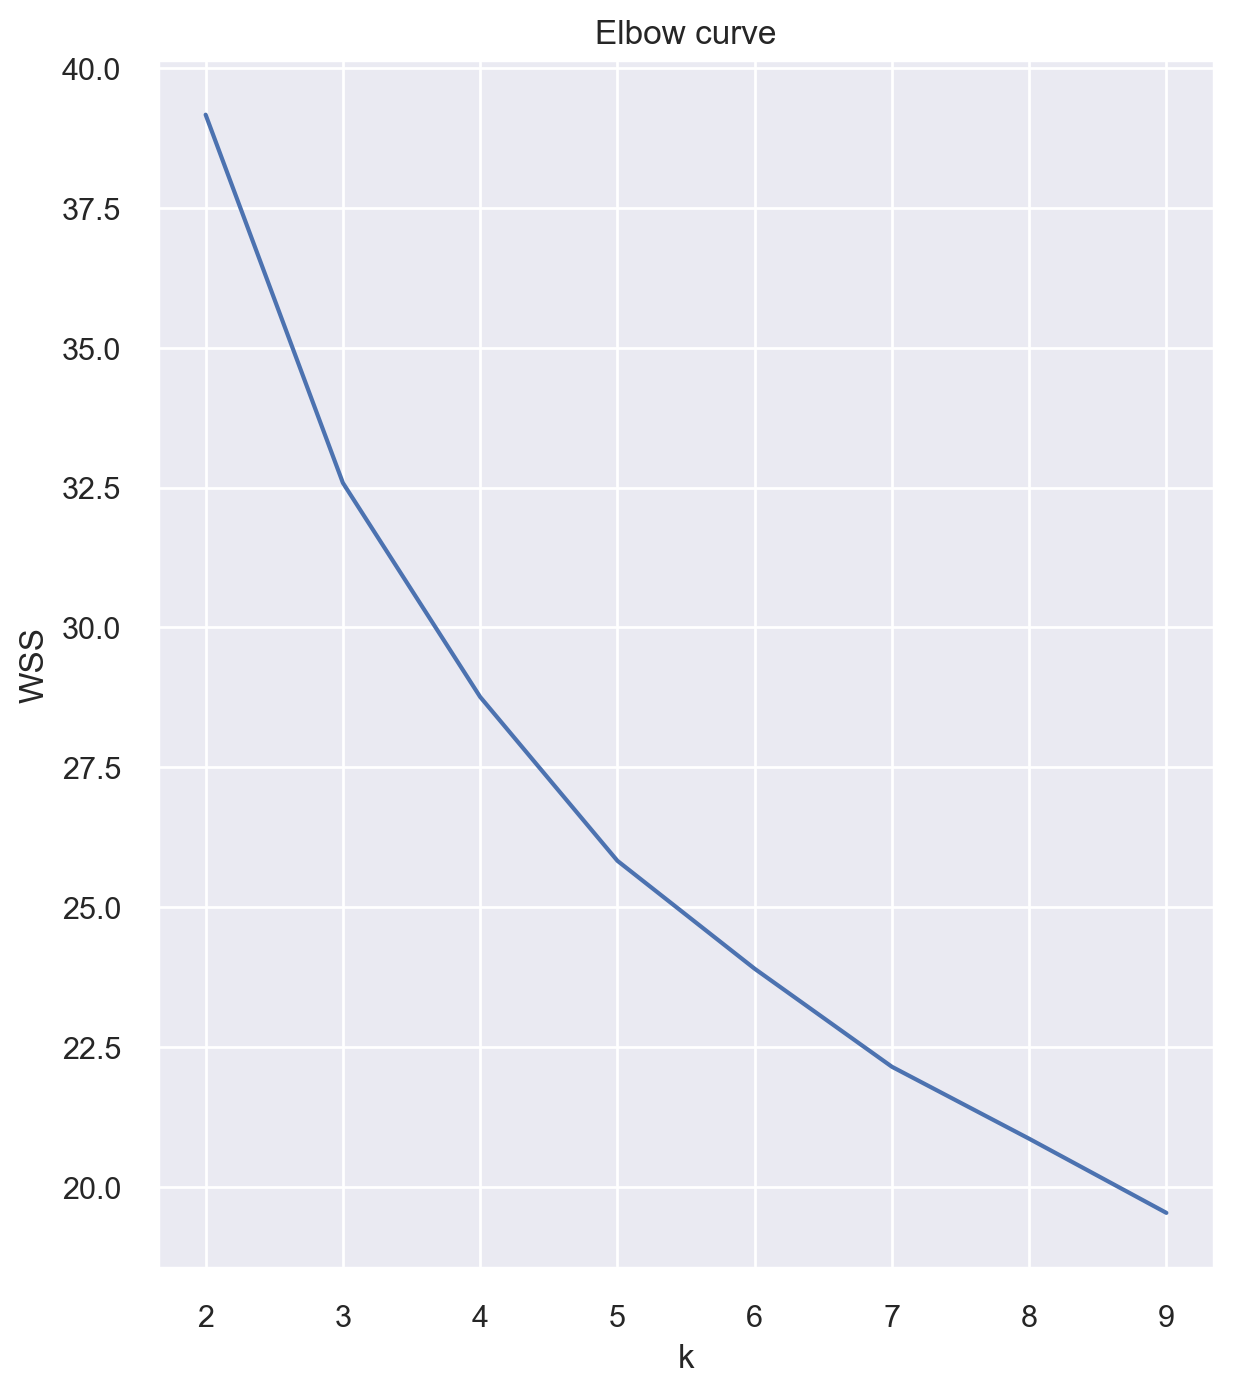

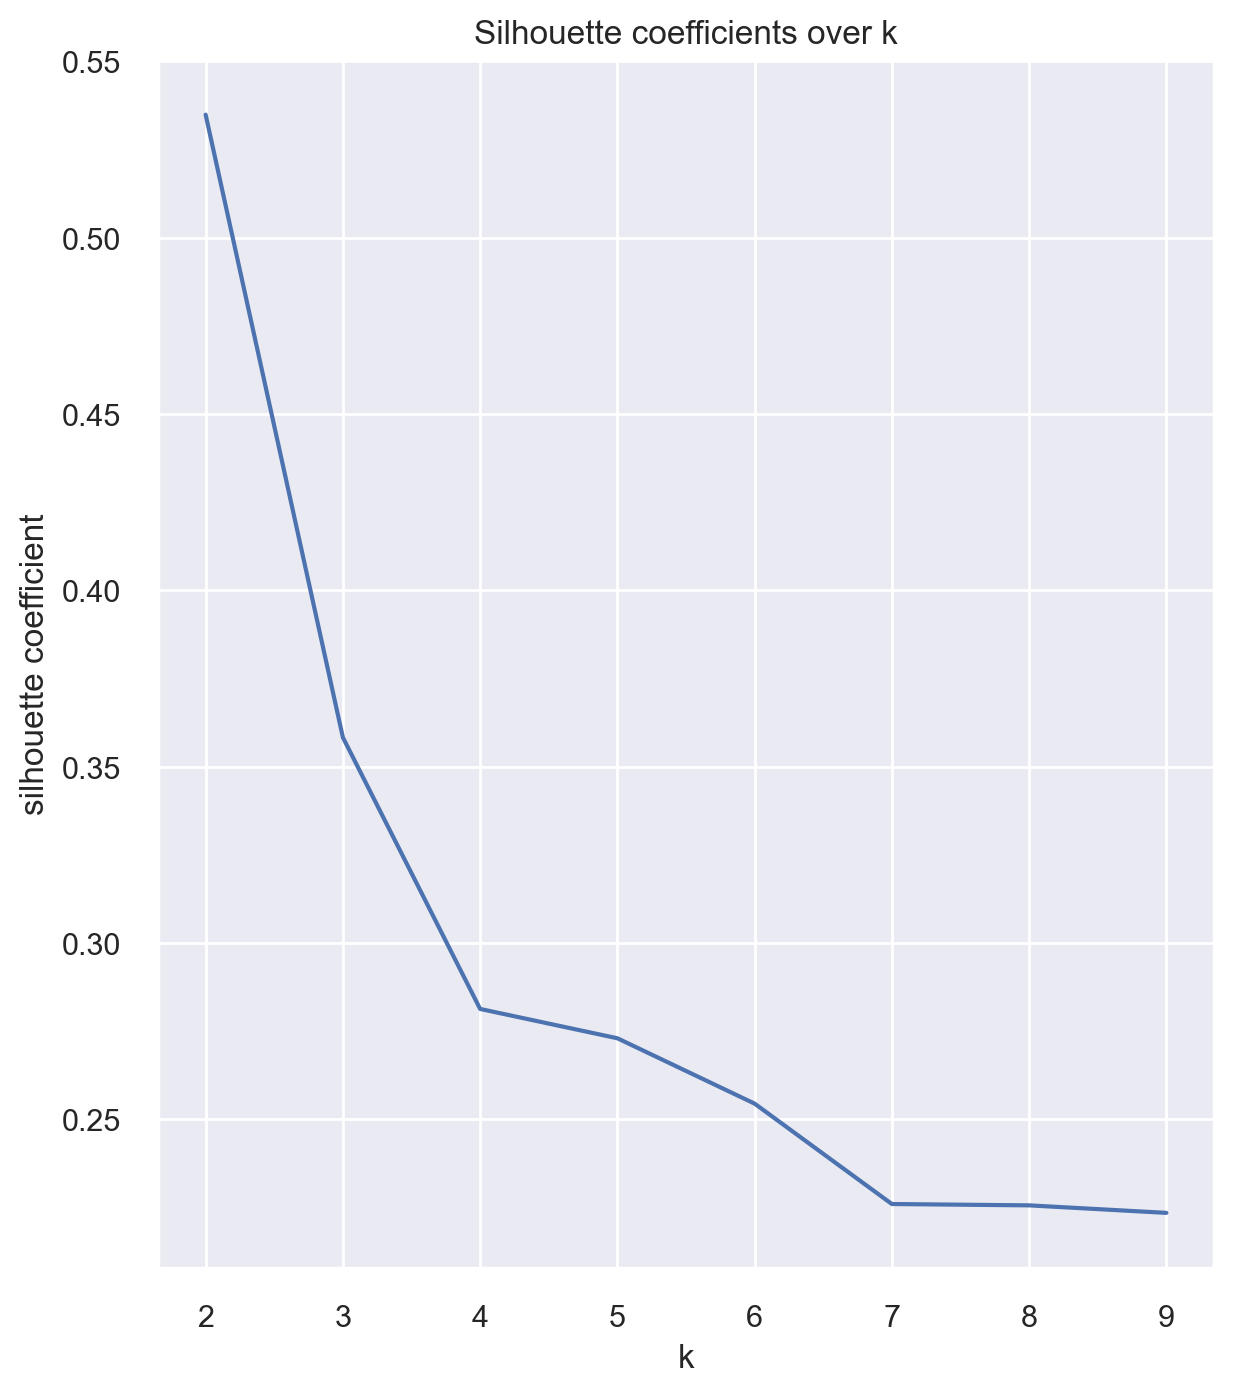

In [153]:
# let this variable be the different dfs I create to test the different variables

v = df_scaled_gent4 # change this to test different feature subsets



X = v.copy()


distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
#plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [154]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=3).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
1    1518
2     283
0     169
Name: cluster, dtype: int64
Silhouette score: 0.3582055934458786


In [155]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=4).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
2    1168
3     473
0     239
1      90
Name: cluster, dtype: int64
Silhouette score: 0.281383067297227


In [156]:
# fit the model with the scaled dataframe
model1 = KMeans(n_clusters=5).fit(X)

# create a new dataframe showing the clusters and scaled data
cluster_df = pd.DataFrame()
cluster_df['tractid']=X.index.values
cluster_df['cluster']=model1.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_df['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(X.values, cluster_df['cluster'])}")

Distribution of clusters:
0    1119
4     504
1     239
3      83
2      25
Name: cluster, dtype: int64
Silhouette score: 0.2732145343232928


## Plotting the Map data

In [18]:
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes

In [21]:
nyc = gpd.read_file('DATA/2010_Census_Tracts/geo_export_83f1c1ac-51a3-4fa2-b748-caf3aeb90965.shp')


Text(0.5, 115.0, 'Longitude')

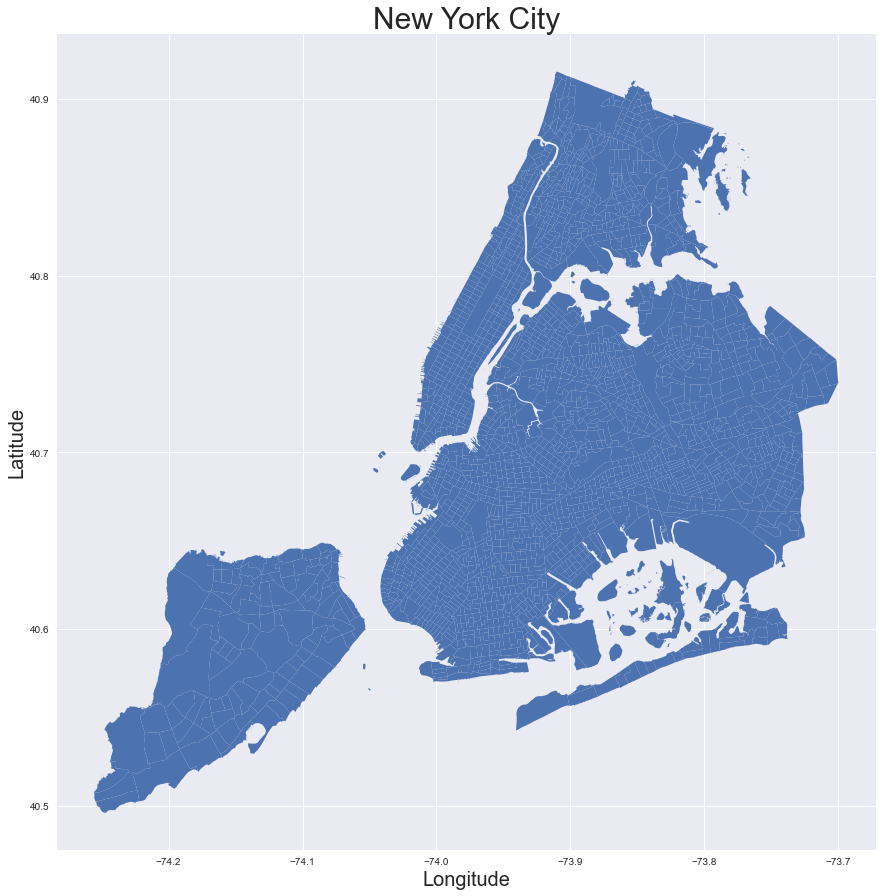

In [24]:
fig, ax = plt.subplots(figsize = (15,15))
nyc.plot(ax=ax)
ax.set_title('New York City',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})